<a href="https://colab.research.google.com/github/f-ssemwanga/MachineLearning_DeepLearning/blob/main/Copy_of_006EvaluatingModelPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Let us create a model and train it on some data before evaluating its performance

**In Practice these are the steps of working with models**
* Build a model
* fit it
* evaluate it
* tweak a model
* fit it --> Evaluate --> tweak --> Fit it -->...
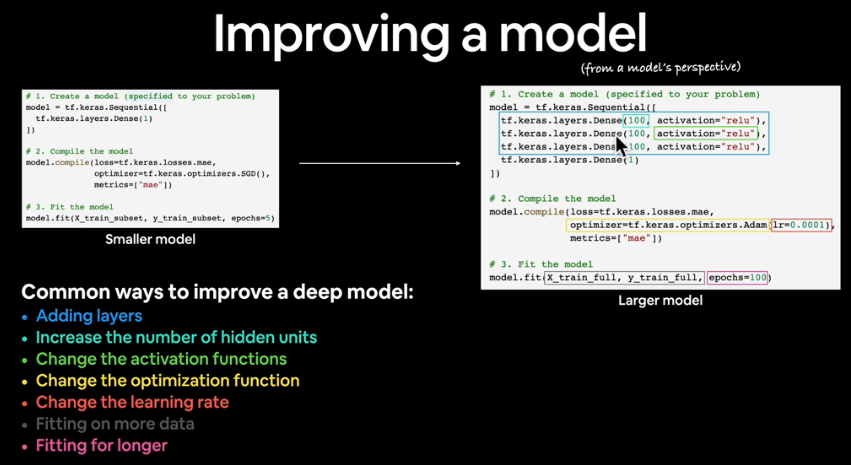

In [ ]:
#Get Data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#create some two numpy arrays
x=np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y=np.array(x+10)


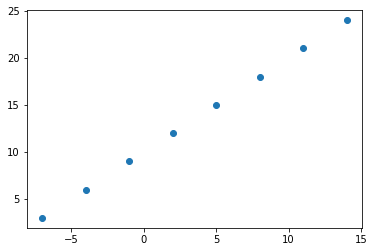

In [ ]:
#visualise the data
plt.scatter(x,y)

In [ ]:
#convert the data into tensors
x = tf.constant(x)
y = tf.constant(y)
#Convert the tensors to float32 as this is used by the Dense Neuro network
x = tf.cast(x,dtype=tf.float32)
y = tf.cast(y,dtype=tf.float32)
x,y 

In [ ]:
#1. create a model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
#compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
#3. Fit the model
#add an extra dimesion to the x before passing it to the model
x_data = tf.expand_dims(x, axis=-1)
model.fit(x_data, y, epochs=100)

In [ ]:
#test model by asking it to predict
model.predict([17.0])

1/1 [==============================] - 0s 110ms/step


array([[26.868128]], dtype=float32)

***Evaluating Models***

* visualise, Visualise, Visualise
* Visualise the data - what data, what does it look like?
* Visualise the mode - what does the model look like?
* Visualise the training of the model - how does it perform when learning?
* Visualise the predictions of the model - how do the predictions of a model line up against the ground truth (original label)



In [ ]:
#Make a bigger data set
#Create a tensor with values in a range of -100, 100, with a step of 4
x = tf.range(-100, 100, 4)
x

In [ ]:
#make labels for the dataset
y = x+10 # this is what we want the model to learn
y

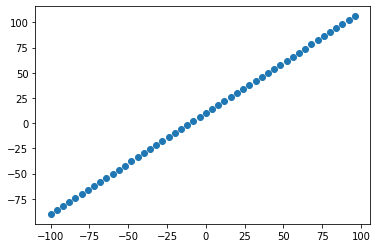

In [ ]:
#visualise the data
plt.scatter(x,y)

### ***Splitting Data into 3 sets***
Split the data above into an 80% training set and a 20% test set
* **Training set** - model learns from this data - 70-80% of total available data
* **Validation set** - model gets tuned on this data - this is where you tweak hyper parameters and test how tweaks affect performance - 10-15% of total available

* **Test Set** - model is evaluated on this data to test what it has learned, it is about 10-15% of total available

* The aim of the above is for the model to achieve **model generalisation** i.e. the model perform well on data it hasn't seen before.

In [ ]:
#Check the length of how many samples
len(x)

50

In [ ]:
#split data into train and test sets
x_train = x[:40] #first 40 are training samples (80%)
y_train = y[:40]

x_test = x[40:] # last 10 are testing samples(20%)
y_test = y[40:]
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

**Visualising data**

Now that we have split the data - let us visualise it
* Using **plt.figure** - allows us to plot two samples of data

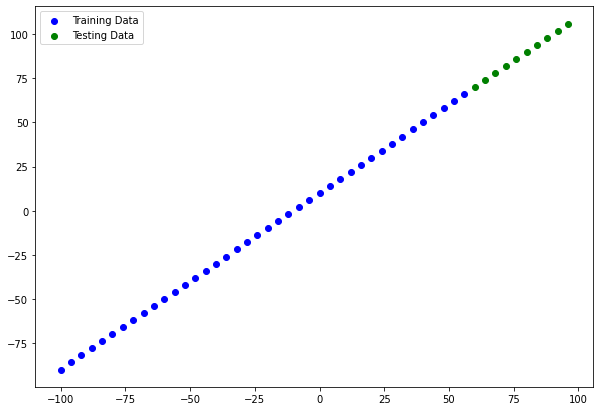

In [ ]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(x_train, y_train, c='b', label= "Training Data")
#lot test data in green
plt.scatter(x_test, y_test, c="g", label="Testing Data")
#show a legend to tell the different data apart
plt.legend();
